In [80]:
import os
from msatutil.msat_dset import msat_dset
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
from rasterio.features import shapes
from shapely.geometry import Polygon, MultiPolygon, shape
from rasterio.transform import from_origin

In [2]:
!. ~/.zshenv
os.getenv(
    'GOOGLE_APPLICATION_CREDENTIALS')
# os.getenv('*')

'/Users/ekyzivat/.config/gcloud/application_default_credentials_MAIR.json'

In [4]:
from google.oauth2 import service_account
credentials_pth = '/Users/ekyzivat/.config/gcloud/application_default_credentials_MAIR.json'
# credentials_pth = os.getenv(
#         'GOOGLE_APPLICATION_CREDENTIALS')
credentials = service_account.Credentials.from_service_account_file(credentials_pth)

ValueError: Service account info was not in the expected format, missing fields token_uri, client_email.

In [3]:
## Check authentication
from google.cloud import storage
# project='msat-prod-data-9475', credentials=)
storage_client = storage.Client()
buckets = storage_client.list_buckets()
print("Buckets:")
for bucket in buckets:
    print(bucket.name)
print("Listed all storage buckets.")

/Users/ekyzivat/mambaforge/envs/geo/lib/python3.11/site-packages/google/auth/_default.py:70: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


Buckets:
msat-prod-data-data-sets
msat-prod-data-datamanager
msat-prod-data-methaneair-level0
msat-prod-data-methaneair-level1
msat-prod-data-methaneair-level2
msat-prod-data-methaneair-level3
msat-prod-data-methaneair-level4
msat-prod-data-methaneair-level4-gim
msat-prod-data-methaneair-upload
msat-prod-data-methanesat-downlink
msat-prod-data-methanesat-level0
msat-prod-data-methanesat-level1
msat-prod-data-methanesat-level2
msat-prod-data-methanesat-level3
msat-prod-data-methanesat-level4
msat-prod-data-methanesat-level4-gim
Listed all storage buckets.


In [ ]:
## Practice
# gs_pth = 'gs://msat-prod-data-methaneair-level3/MAIR-X/2023/10/13/MX064/po-675/level3/5x1/segment/20231212T193124_po-675/02_Hale-Centre-Feedyard-Ag/10m/MethaneAIR_L3_segment_20231013T145441_20231013T145912_dpp.nc'
gs_pth = 'gs://msat-prod-data-methaneair-level3/MAIR-E/2022/10/25/RF01E/po-483a/level3/5x1/mosaic/20231103T174543_po-483a/01_Four-Corners-PP/30m/MethaneAIR_L3_mosaic_20221025T160940_20221025T161511_dpp.nc'
ds = msat_dset(gs_pth)

In [93]:
## I/O
L3_mosaics_catalogue_pth = '/Volumes/metis/MAIR/Index/L3_mosaics.xlsx'
working_dir = '/Volumes/metis/MAIR/Spatial_catalogue'
catalogue_shp_out_pth = os.path.join(working_dir, 'L3_mosaics_20240208.shp')

In [89]:
gdf = pd.read_excel(L3_mosaics_catalogue_pth)

In [90]:
gdf

,rowid,uri,collection,production_environment,platform,campaign,flight_date,flight_name,production_operation,aggregation,production_timestamp,level3_target_id,level3_target_name,level3_resolution,time_start,time_end
0,1,gs://msat-prod-data-methaneair-level3/MAIR-E/2...,level3_mosaic,prod,methaneair,MAIR-E,2022-10-25,RF01E,po-483a,5x1,2023-11-03 17:45:43,1.0,Four-Corners-PP,10m,2022-10-25 16:09:40,2022-10-25 16:15:11
1,2,gs://msat-prod-data-methaneair-level3/MAIR-E/2...,level3_mosaic,prod,methaneair,MAIR-E,2022-10-25,RF01E,po-483a,5x1,2023-11-03 17:45:43,1.0,Four-Corners-PP,30m,2022-10-25 16:09:40,2022-10-25 16:15:11
2,3,gs://msat-prod-data-methaneair-level3/MAIR-E/2...,level3_mosaic,prod,methaneair,MAIR-E,2022-10-25,RF01E,po-483a,5x1,2023-11-03 17:45:43,2.0,Cholla-PP,10m,2022-10-25 16:28:46,2022-10-25 16:37:18
3,4,gs://msat-prod-data-methaneair-level3/MAIR-E/2...,level3_mosaic,prod,methaneair,MAIR-E,2022-10-25,RF01E,po-483a,5x1,2023-11-03 17:45:43,2.0,Cholla-PP,30m,2022-10-25 16:28:46,2022-10-25 16:37:18
4,5,gs://msat-prod-data-methaneair-level3/MAIR-E/2...,level3_mosaic,prod,methaneair,MAIR-E,2022-10-25,RF01E,po-483a,5x1,2023-11-03 17:45:43,3.0,inbound-map,10m,2022-10-25 16:36:48,2022-10-25 16:45:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,gs://msat-prod-data-methaneair-level3/MAIR-X/2...,level3_mosaic,prod,methaneair,MAIR-X,2023-09-06,MX047,po-620,5x1,2024-01-03 14:44:40,10.0,Walker-Mountain-Landfill,10m,2023-09-06 15:02:35,2023-09-06 15:07:06
996,997,gs://msat-prod-data-methaneair-level3/MAIR-X/2...,level3_mosaic,prod,methaneair,MAIR-X,2023-09-06,MX047,po-620,5x1,2024-01-03 14:44:40,10.0,Walker-Mountain-Landfill,30m,2023-09-06 15:02:35,2023-09-06 15:07:06
997,998,gs://msat-prod-data-methaneair-level3/MAIR-X/2...,level3_mosaic,prod,methaneair,MAIR-X,2023-09-06,MX047,po-620,5x1,2024-01-03 14:44:40,11.0,Three-Corners-Landfill,10m,2023-09-06 15:06:36,2023-09-06 15:11:07
998,999,gs://msat-prod-data-methaneair-level3/MAIR-X/2...,level3_mosaic,prod,methaneair,MAIR-X,2023-09-06,MX047,po-620,5x1,2024-01-03 14:44:40,11.0,Three-Corners-Landfill,30m,2023-09-06 15:06:36,2023-09-06 15:11:07


Function to extract data mask as geometry

In [99]:
def validDataArea2Gdf(ds, simplify=None):
    '''
    This function converts valid data areas from a msatutil.msat_dset.msat_dset (Netcdf4 Dataset) into a MultiPolygon Shapefly geometry.

    Parameters:
    - ds: Netcdf4 Dataset object containing the data
    - simplify: Not used in the function (default: None)

    Returns:
    - multipolygon: A MultiPolygon object representing the valid data areas

    Notes:
    - The function assumes a specific geospatial resolution of '1/3 arcseconds' and returns an assertion error if this is not true.
    - The function assumes geographic coordinates in WGS84 (EPSG:4326).
    - The function assumes that the dataset has a 'xch4' variable that contains the valid data areas.
    - It creates a MultiPolygon object from valid data areas based on the 'xch4' variable in the dataset.
    - The function uses a transformation defined by the geospatial information of the dataset.

    Examples:
    validDataArea2Gdf(ds, simplify=None)
    '''
    # Define the transform and metadata for the temporary raster
    if ds.geospatial_lat_resolution == ds.geospatial_lon_resolution == '1/3 arcseconds':
        res = 1/60/60/3
    elif ds.geospatial_lat_resolution == ds.geospatial_lon_resolution == '1 arcsecond':
        res = 1/60/60
    else:
        raise ValueError("Geospatial resolutions of latitude and longitude do not match or value needs to be specified")

    transform = from_origin(float(ds.geospatial_lon_min), float(ds.geospatial_lat_max), res,
                        res)  # Adjust these values

    data_variable = ds.variables['xch4'][:]
    valid_data_mask = ~np.isnan(data_variable)

    ## Convert to geometry
    shapes_gen = shapes((~valid_data_mask.mask).astype('uint8'), transform=transform)

    polygons = []
    for poly_shape, value in shapes_gen:
        if value == 1:  # Valid data value
            polygons.append(shape(poly_shape))

    multipolygon = MultiPolygon(polygons)

    if simplify is not None:
        # Simplify the geometry
        multipolygon = multipolygon.simplify(simplify, preserve_topology=False)
    return multipolygon


# geom_valid_data_area = validDataArea2Gdf(
#     ds, simplify=0.001)  # , crs='EPSG:4326')

## Loop

In [95]:
gdf = gdf[:3]
gdf

,rowid,uri,collection,production_environment,platform,campaign,flight_date,flight_name,production_operation,aggregation,production_timestamp,level3_target_id,level3_target_name,level3_resolution,time_start,time_end
0,1,gs://msat-prod-data-methaneair-level3/MAIR-E/2...,level3_mosaic,prod,methaneair,MAIR-E,2022-10-25,RF01E,po-483a,5x1,2023-11-03 17:45:43,1.0,Four-Corners-PP,10m,2022-10-25 16:09:40,2022-10-25 16:15:11
1,2,gs://msat-prod-data-methaneair-level3/MAIR-E/2...,level3_mosaic,prod,methaneair,MAIR-E,2022-10-25,RF01E,po-483a,5x1,2023-11-03 17:45:43,1.0,Four-Corners-PP,30m,2022-10-25 16:09:40,2022-10-25 16:15:11
2,3,gs://msat-prod-data-methaneair-level3/MAIR-E/2...,level3_mosaic,prod,methaneair,MAIR-E,2022-10-25,RF01E,po-483a,5x1,2023-11-03 17:45:43,2.0,Cholla-PP,10m,2022-10-25 16:28:46,2022-10-25 16:37:18


In [100]:
for index, row in gdf.iterrows():
    gs_pth = row['uri']
    print(gs_pth.split('/mosaic/')[-1])
    ds = msat_dset(gs_pth)
    geom = validDataArea2Gdf(ds, simplify=0.001)
    gdf.at[index, 'geometry'] = geom

gdf

20231103T174543_po-483a/01_Four-Corners-PP/10m/MethaneAIR_L3_mosaic_20221025T160940_20221025T161511_dpp.nc


/Users/ekyzivat/mambaforge/envs/geo/lib/python3.11/site-packages/google/auth/_default.py:70: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


20231103T174543_po-483a/01_Four-Corners-PP/30m/MethaneAIR_L3_mosaic_20221025T160940_20221025T161511_dpp.nc


/Users/ekyzivat/mambaforge/envs/geo/lib/python3.11/site-packages/google/auth/_default.py:70: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/Users/ekyzivat/mambaforge/envs/geo/lib/python3.11/site-packages/shapely/constructive.py:883: RuntimeWarning: invalid value encountered in simplify
  return lib.simplify(geometry, tolerance, **kwargs)
/Users/ekyzivat/mambaforge/envs/geo/lib/python3.11/site-packages/google/auth/_default.py:70: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive

20231103T174543_po-483a/02_Cholla-PP/10m/MethaneAIR_L3_mosaic_20221025T162846_20221025T163718_dpp.nc


,rowid,uri,collection,production_environment,platform,campaign,flight_date,flight_name,production_operation,aggregation,production_timestamp,level3_target_id,level3_target_name,level3_resolution,time_start,time_end,geometry
0,1,gs://msat-prod-data-methaneair-level3/MAIR-E/2...,level3_mosaic,prod,methaneair,MAIR-E,2022-10-25,RF01E,po-483a,5x1,2023-11-03 17:45:43,1.0,Four-Corners-PP,10m,2022-10-25 16:09:40,2022-10-25 16:15:11,MULTIPOLYGON (((-108.5436111111111 36.97879629...
1,2,gs://msat-prod-data-methaneair-level3/MAIR-E/2...,level3_mosaic,prod,methaneair,MAIR-E,2022-10-25,RF01E,po-483a,5x1,2023-11-03 17:45:43,1.0,Four-Corners-PP,30m,2022-10-25 16:09:40,2022-10-25 16:15:11,MULTIPOLYGON (((-108.45194444444445 36.6841666...
2,3,gs://msat-prod-data-methaneair-level3/MAIR-E/2...,level3_mosaic,prod,methaneair,MAIR-E,2022-10-25,RF01E,po-483a,5x1,2023-11-03 17:45:43,2.0,Cholla-PP,10m,2022-10-25 16:28:46,2022-10-25 16:37:18,POLYGON ((-110.67787037037037 35.2906481481481...


In [101]:
gdf.crs = 'EPSG:4326'

In [105]:
gdf = gpd.GeoDataFrame(gdf, geometry='geometry',
                       crs='EPSG:4326')  # , crs='EPSG:4326')
for col in ['flight_date', 'production_timestamp', 'time_start', 'time_end']:
    gdf[col] = gdf[col].astype(str)
gdf.to_file(catalogue_shp_out_pth)

/var/folders/rv/sn0kln2103b9fs4xl56n3w7w0000gn/T/ipykernel_62924/3360806509.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(catalogue_shp_out_pth)


## View

In [ ]:

# Usage
geom_valid_data_area = validDataArea2Gdf(
    ds, simplify=0.001) #, crs='EPSG:4326')

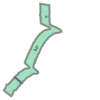

In [75]:
geom_valid_data_area

<Axes: >

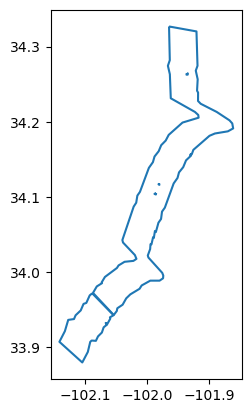

In [76]:
gdf_valid_data_area = gpd.GeoDataFrame(
    geometry=[geom_valid_data_area], crs='EPSG:4326')
gdf_valid_data_area.boundary.plot()

In [42]:
gdf_valid_data_area

,geometry
0,"MULTIPOLYGON (((-101.99481 33.98833, -101.9948..."


In [ ]:
ds.geospatial_lat_resolution
# ds.geospatial_lon_min

'1/3 arcseconds'

In [ ]:
type(ds)

msatutil.msat_dset.msat_dset

## Testing mair ls

In [6]:
from msatutil.mair_ls import mair_ls
mair_ls('gs://msat-dev-science-data/L3_mosaics.csv', 'MX005', resolution='30m')

gs://msat-prod-data-methaneair-level3/MAIR-X/2023/06/04/MX005/po-464a/level3/5x1/mosaic/20231211T223832_po-464a/01_Gottsch-Feed-Yard-Ag/30m/MethaneAIR_L3_mosaic_20230604T141950_20230604T142351_dpp.nc
gs://msat-prod-data-methaneair-level3/MAIR-X/2023/06/04/MX005/po-464a/level3/5x1/mosaic/20231211T223832_po-464a/02_Grand-Island-Landfill/30m/MethaneAIR_L3_mosaic_20230604T142621_20230604T143023_dpp.nc
gs://msat-prod-data-methaneair-level3/MAIR-X/2023/06/04/MX005/po-464a/level3/5x1/mosaic/20231211T223832_po-464a/03_Broken-Bow-Ag/30m/MethaneAIR_L3_mosaic_20230604T143424_20230604T143855_dpp.nc
gs://msat-prod-data-methaneair-level3/MAIR-X/2023/06/04/MX005/po-464a/level3/5x1/mosaic/20231211T223832_po-464a/04_Northern-Lights_Dairy-Ag/30m/MethaneAIR_L3_mosaic_20230604T152410_20230604T152841_dpp.nc
gs://msat-prod-data-methaneair-level3/MAIR-X/2023/06/04/MX005/po-464a/level3/5x1/mosaic/20231211T223832_po-464a/05_inbound-map/30m/MethaneAIR_L3_mosaic_20230604T152741_20230604T153320_dpp.nc
gs://msat-p

,rowid,uri,collection,production_environment,platform,campaign,flight_date,flight_name,production_operation,aggregation,production_timestamp,level3_target_id,level3_target_name,level3_resolution,time_start,time_end
342,343,gs://msat-prod-data-methaneair-level3/MAIR-X/2...,level3_mosaic,prod,methaneair,MAIR-X,2023-06-04,MX005,po-464a,5x1,2023-12-11 22:38:32,1.0,Gottsch-Feed-Yard-Ag,30m,2023-06-04 14:19:50,2023-06-04 14:23:51
344,345,gs://msat-prod-data-methaneair-level3/MAIR-X/2...,level3_mosaic,prod,methaneair,MAIR-X,2023-06-04,MX005,po-464a,5x1,2023-12-11 22:38:32,2.0,Grand-Island-Landfill,30m,2023-06-04 14:26:21,2023-06-04 14:30:23
346,347,gs://msat-prod-data-methaneair-level3/MAIR-X/2...,level3_mosaic,prod,methaneair,MAIR-X,2023-06-04,MX005,po-464a,5x1,2023-12-11 22:38:32,3.0,Broken-Bow-Ag,30m,2023-06-04 14:34:24,2023-06-04 14:38:55
348,349,gs://msat-prod-data-methaneair-level3/MAIR-X/2...,level3_mosaic,prod,methaneair,MAIR-X,2023-06-04,MX005,po-464a,5x1,2023-12-11 22:38:32,4.0,Northern-Lights_Dairy-Ag,30m,2023-06-04 15:24:10,2023-06-04 15:28:41
350,351,gs://msat-prod-data-methaneair-level3/MAIR-X/2...,level3_mosaic,prod,methaneair,MAIR-X,2023-06-04,MX005,po-464a,5x1,2023-12-11 22:38:32,5.0,inbound-map,30m,2023-06-04 15:27:41,2023-06-04 15:33:20
352,353,gs://msat-prod-data-methaneair-level3/MAIR-X/2...,level3_mosaic,prod,methaneair,MAIR-X,2023-06-04,MX005,po-464a,5x1,2023-12-11 22:38:32,6.0,priority-target,30m,2023-06-04 15:34:03,2023-06-04 17:56:19
354,355,gs://msat-prod-data-methaneair-level3/MAIR-X/2...,level3_mosaic,prod,methaneair,MAIR-X,2023-06-04,MX005,po-464a,5x1,2023-12-11 22:38:32,7.0,upwind,30m,2023-06-04 15:34:03,2023-06-04 15:41:36
356,357,gs://msat-prod-data-methaneair-level3/MAIR-X/2...,level3_mosaic,prod,methaneair,MAIR-X,2023-06-04,MX005,po-464a,5x1,2023-12-11 22:38:32,8.0,priority-map-1,30m,2023-06-04 15:41:06,2023-06-04 16:48:27
358,359,gs://msat-prod-data-methaneair-level3/MAIR-X/2...,level3_mosaic,prod,methaneair,MAIR-X,2023-06-04,MX005,po-464a,5x1,2023-12-11 22:38:32,9.0,priority-map-2,30m,2023-06-04 16:58:30,2023-06-04 17:21:07
360,361,gs://msat-prod-data-methaneair-level3/MAIR-X/2...,level3_mosaic,prod,methaneair,MAIR-X,2023-06-04,MX005,po-464a,5x1,2023-12-11 22:38:32,10.0,priority-map-3,30m,2023-06-04 17:31:41,2023-06-04 17:54:48


## Scratch

In [ ]:
ds_gcs = xr.open_dataset(gs_pth)

OSError: [Errno -36] NetCDF: Invalid argument: 'gs://msat-prod-data-methaneair-level3/MAIR-X/2023/10/13/MX064/po-675/level3/5x1/segment/20231212T193124_po-675/02_Hale-Centre-Feedyard-Ag/10m/MethaneAIR_L3_segment_20231013T145441_20231013T145912_dpp.nc'

In [ ]:
meta = {
    'driver': 'GTiff',
    'dtype': 'uint8',
    'nodata': 0,
    'width': valid_data_mask.shape[1],
    'height': valid_data_mask.shape[0],
    'count': 1,
    'crs': 'EPSG:4326',  # '+proj=latlong',  # Adjust the CRS
    'transform': transform
}

# Write the valid data mask to a temporary raster file
# raster_pth = os.path.join('/Volumes/metis/MAIR/Spatial_catalogue/tmp', 'temp_valid_data_mask.tif')
# with rasterio.open(raster_pth, 'w', **meta) as dst:
#     dst.write(valid_data_mask.astype('uint8'), 1)